In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unclean-data/unclean_data (1).csv


In [194]:
#Step 1: Load and Explore the Dataset

import pandas as pd

# Load the dataset
file_path = '/kaggle/input/unclean-data/unclean_data (1).csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows to understand the structure
data.head()



,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar?ÿ,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre?ÿ,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter?ÿ,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


In [195]:
# Review basic information and summary statistics of the dataset
data.info()  # Summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                14 non-null     object 
 1   num_critic_for_reviews     14 non-null     int64  
 2   duration                   11 non-null     float64
 3   DIRECTOR_facebook_likes    12 non-null     object 
 4   actor_3_facebook_likes     14 non-null     int64  
 5   ACTOR_1_facebook_likes     14 non-null     int64  
 6   gross                      14 non-null     int64  
 7   num_voted_users            13 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       9 non-null      float64
 10  num_user_for_reviews       14 non-null     int64  
 11  budget                     14 non-null     int64  
 12  title_year                 14 non-null     int64  
 13  ACTOR_2_facebook_likes     13 non-null     float64
 

In [173]:
data.describe()  # Statistical summary of numeric columns

,num_critic_for_reviews,duration,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
count,14.000000,11.000000,14.000000,14.000000,1.400000e+01,1.300000e+01,12.000000,9.000000,14.000000,1.400000e+01,14.000000,13.000000,14.000000,7.000000
mean,506.142857,150.727273,5866.142857,18206.428571,3.335836e+08,4.621578e+05,44773.583333,2.111111,1620.071429,2.462643e+08,2010.500000,8455.846154,7.171429,2011.142857
std,169.069789,21.679903,8289.592695,13905.214361,1.720674e+08,2.687059e+05,37290.813335,1.269296,866.672102,2.426823e+07,3.632122,8541.019541,0.673028,3.976119
min,302.000000,106.000000,161.000000,451.000000,7.305868e+07,2.122040e+05,1873.000000,1.000000,387.000000,2.000000e+08,2006.000000,393.000000,6.100000,2007.000000
25%,379.250000,141.000000,611.250000,3500.000000,2.002574e+08,2.948100e+05,9983.500000,1.000000,1024.750000,2.390000e+08,2007.250000,632.000000,6.725000,2008.000000
50%,448.000000,151.000000,1000.000000,21000.000000,3.198266e+08,3.830560e+05,47202.500000,2.000000,1240.500000,2.500000e+08,2009.500000,5000.000000,7.200000,2009.000000
75%,635.000000,162.500000,8500.000000,26000.000000,4.418561e+08,4.712200e+05,67064.750000,3.000000,2250.750000,2.560000e+08,2014.250000,11000.000000,7.500000,2015.000000
max,813.000000,183.000000,23000.000000,40000.000000,7.605058e+08,1.144337e+06,106759.000000,4.000000,3054.000000,3.000000e+08,2016.000000,23000.000000,8.500000,2016.000000


In [196]:
#Step 2: Identify and Handle missing values

# Identify columns with missing values
missing_values = data.isnull().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])



duration                     3
DIRECTOR_facebook_likes      2
num_voted_users              1
Cast_Total_facebook_likes    2
facenumber_in_poster         5
ACTOR_2_facebook_likes       1
title_year.1                 7
dtype: int64


In [197]:
#Handling Missing Values

# List of columns to handle missing values for
columns_to_handle = [
    'duration', 
    'DIRECTOR_facebook_likes', 
    'num_voted_users', 
    'Cast_Total_facebook_likes', 
    'facenumber_in_poster', 
    'ACTOR_2_facebook_likes', 
    'title_year.1'
]

# Convert all relevant columns to numeric, forcing errors to NaN
for column in columns_to_handle:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Handle missing values for each column:

# Fill missing values in 'duration' using the mean
data['duration'] = data['duration'].fillna(data['duration'].mean())

# Fill missing values in 'DIRECTOR_facebook_likes' using the median
data['DIRECTOR_facebook_likes'] = data['DIRECTOR_facebook_likes'].fillna(data['DIRECTOR_facebook_likes'].median())

# Fill missing values in 'num_voted_users' using the mode
data['num_voted_users'] = data['num_voted_users'].fillna(data['num_voted_users'].mode()[0])

# Drop rows with missing values in 'Cast_Total_facebook_likes'
data = data.dropna(subset=['Cast_Total_facebook_likes'])

# Fill missing values in 'facenumber_in_poster' using the mean
data['facenumber_in_poster'] = data['facenumber_in_poster'].fillna(data['facenumber_in_poster'].mean())

# Fill missing values in 'ACTOR_2_facebook_likes' using the median
data['ACTOR_2_facebook_likes'] = data['ACTOR_2_facebook_likes'].fillna(data['ACTOR_2_facebook_likes'].median())


# Drop the 'title_year.1' column
data = data.drop('title_year.1', axis=1)

# Verify that no missing values remain
print(data.isnull().sum())




movie_title                  0
num_critic_for_reviews       0
duration                     0
DIRECTOR_facebook_likes      0
actor_3_facebook_likes       0
ACTOR_1_facebook_likes       0
gross                        0
num_voted_users              0
Cast_Total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
ACTOR_2_facebook_likes       0
imdb_score                   0
dtype: int64


In [198]:
#Step 3: Detect and Address Outliers

from scipy import stats
import numpy as np

# Create a copy of the data to avoid modifying the original
data_numeric = data.copy()

# Apply Z-score method to detect outliers
z_scores = np.abs(stats.zscore(data_numeric.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)

print("Outliers detected at positions:", outliers) # No outliers apparently.


Outliers detected at positions: (array([3]), array([2]))


In [199]:
# Remove rows where Z-scores indicate outliers (Z > 3 or Z < -3)
data_numeric = data_numeric[(z_scores < 3).all(axis=1)]



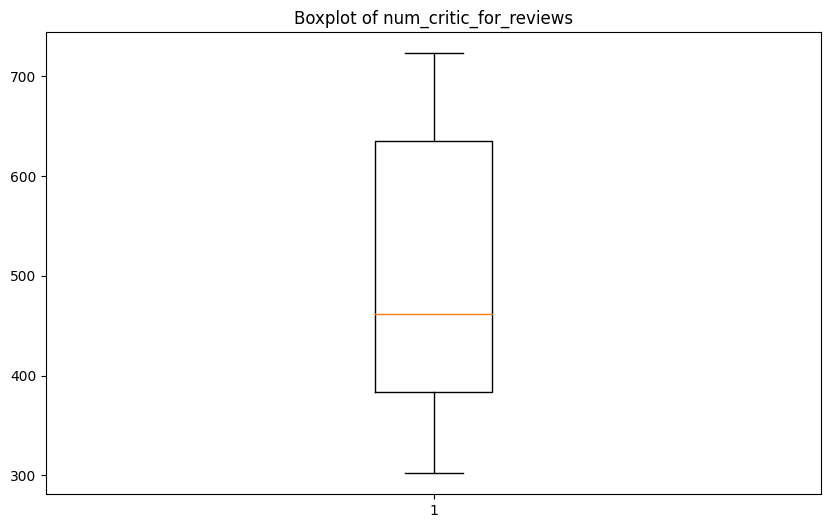

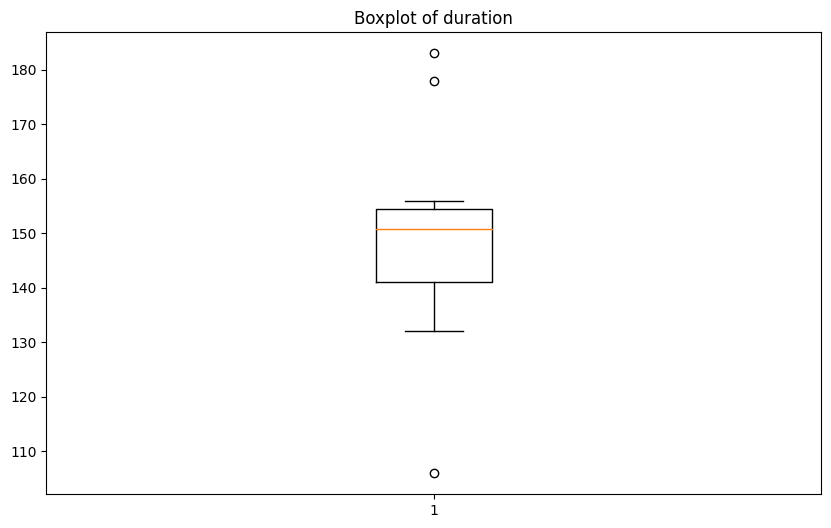

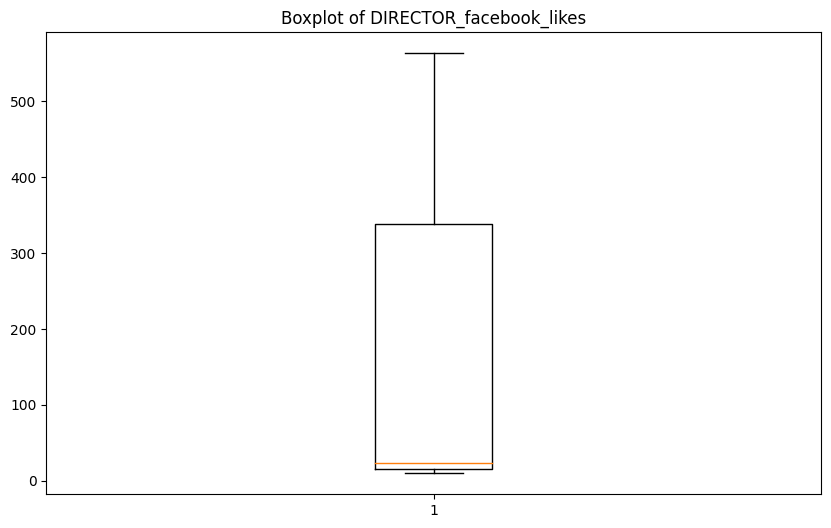

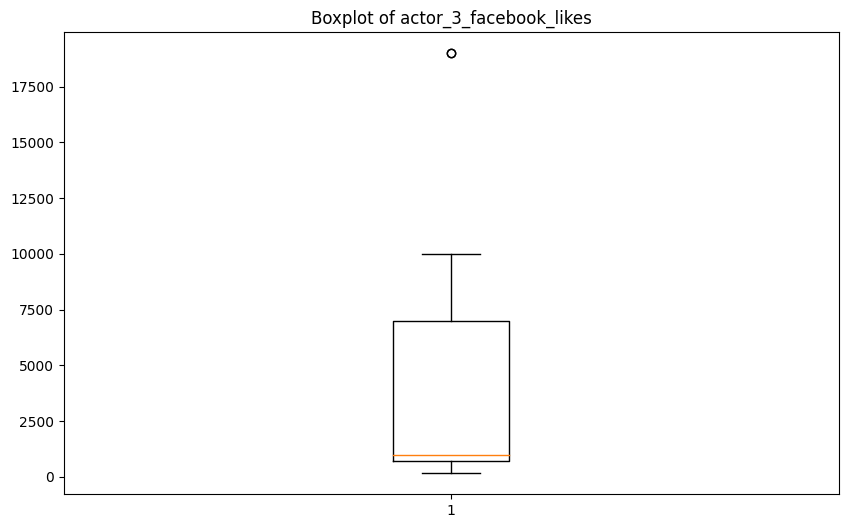

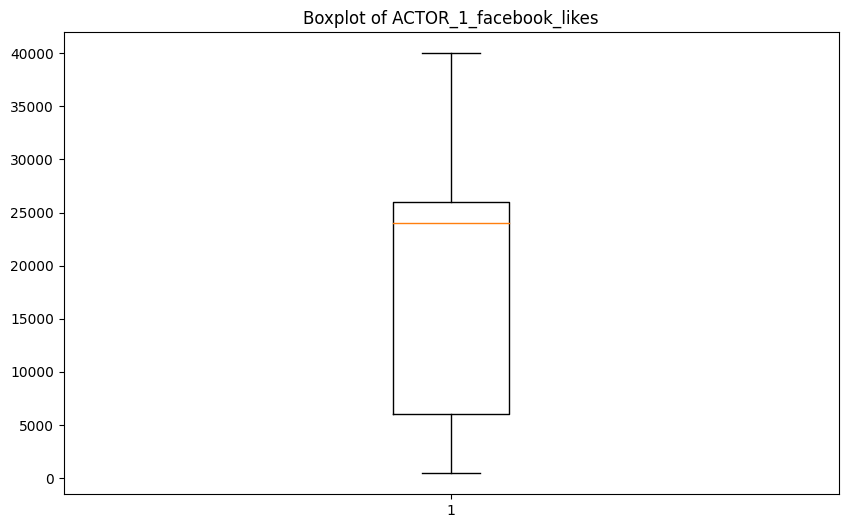

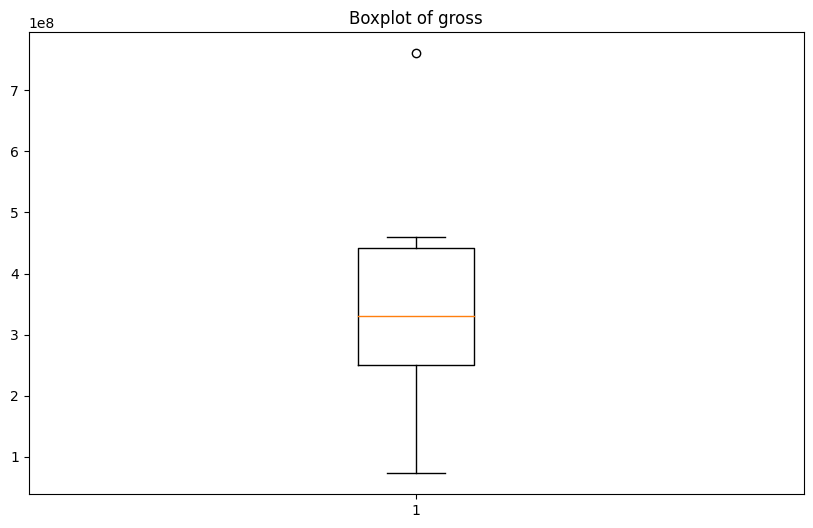

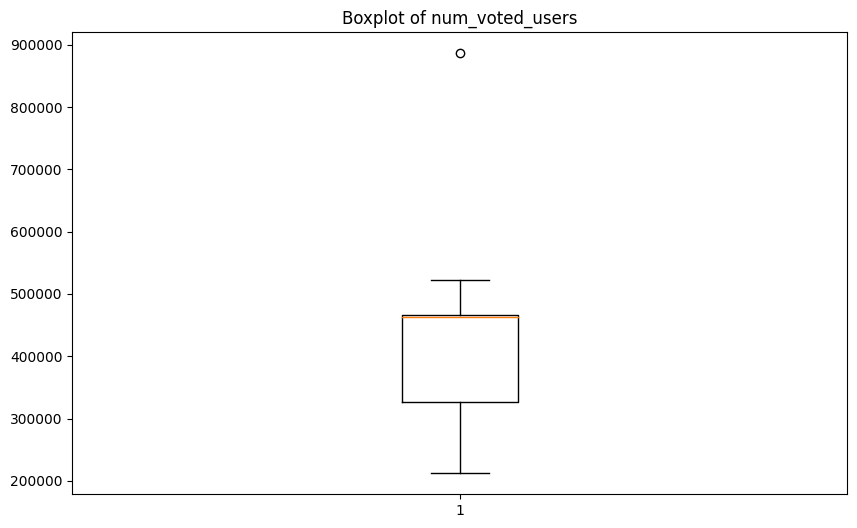

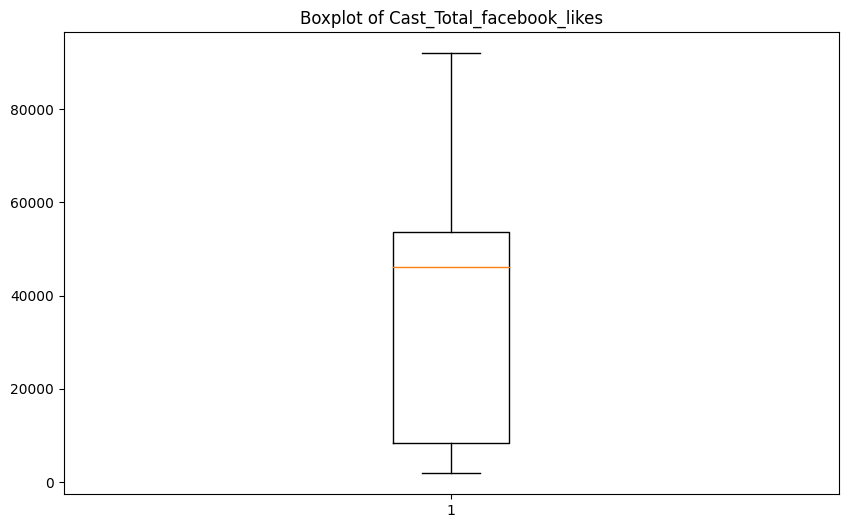

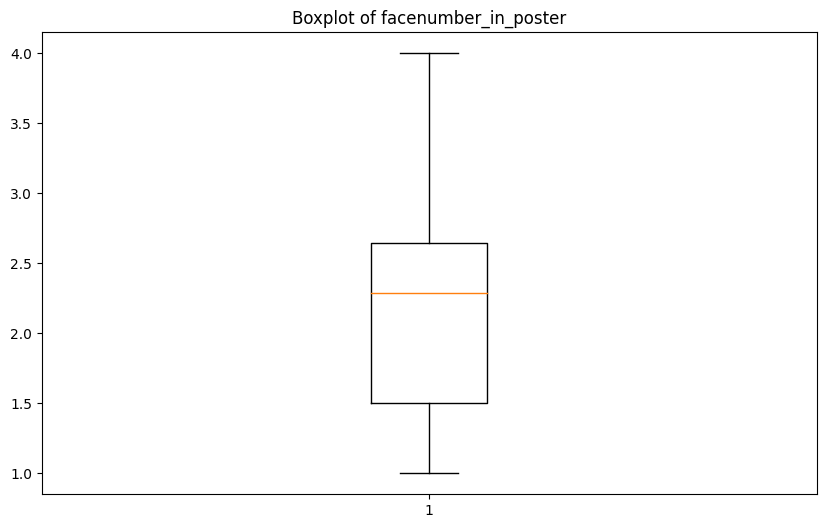

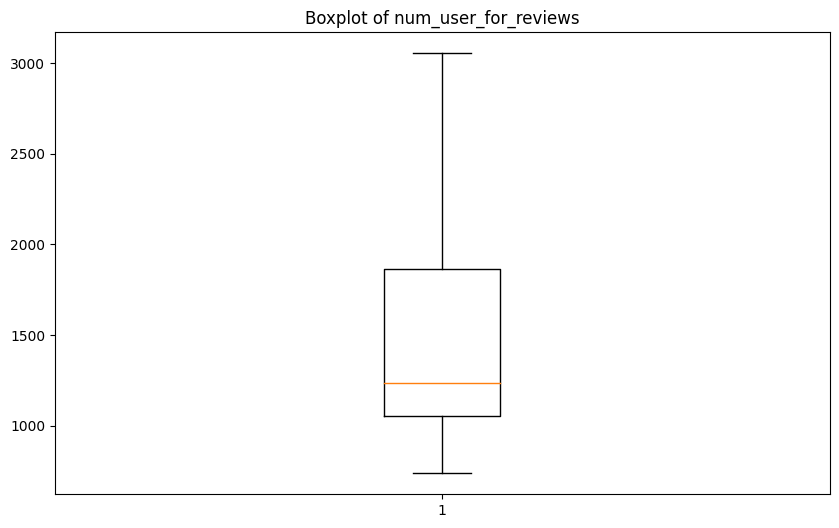

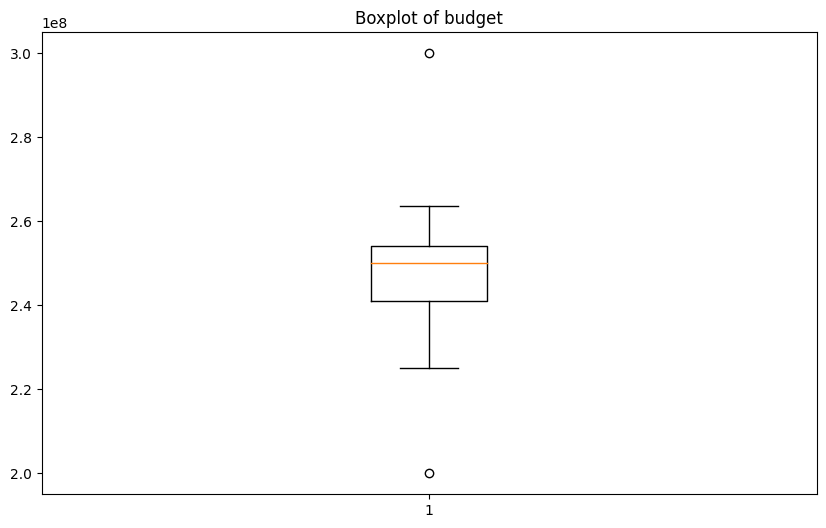

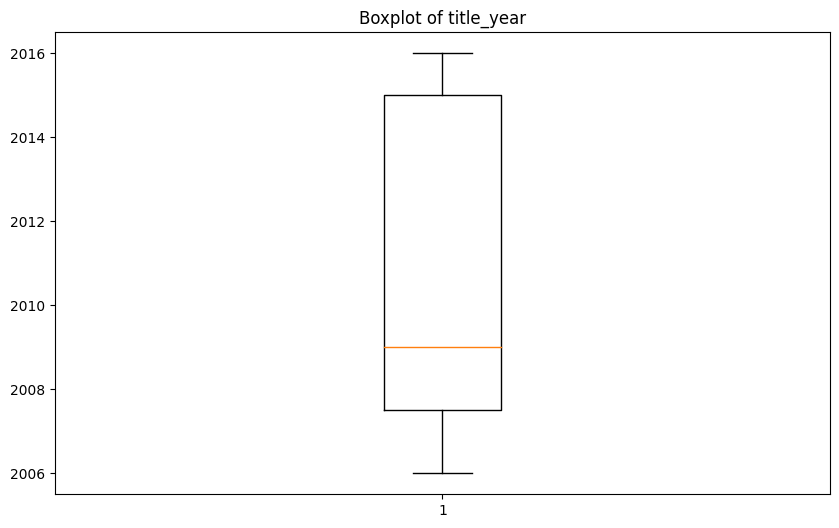

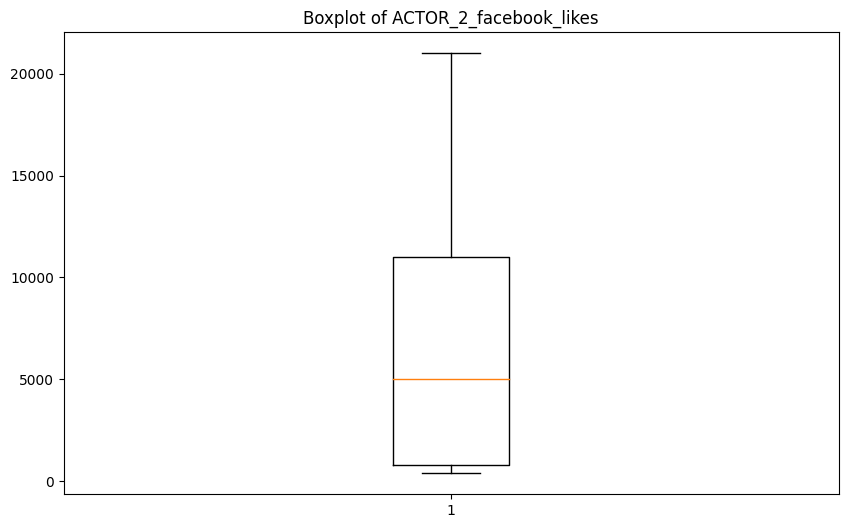

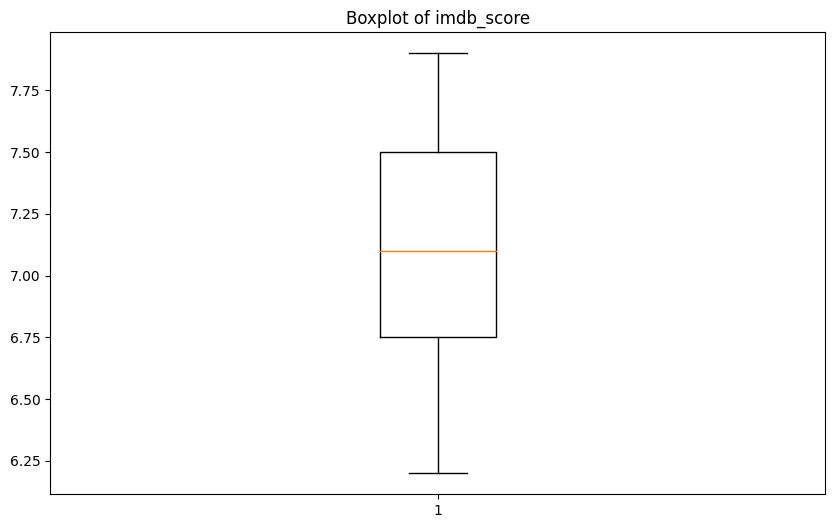

In [200]:
import matplotlib.pyplot as plt

# Visualize each numerical column using boxplots
for column in data_numeric.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_numeric[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()


In [201]:
#Step 4: Remove Duplicates

# Check for duplicate rows
duplicate_rows = data_numeric[data_numeric.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 1


In [202]:
# Remove duplicate rows
data_numeric = data_numeric.drop_duplicates()

# Confirm that duplicates have been removed
remaining_duplicates = data_numeric[data_numeric.duplicated()]
print(f"Number of remaining duplicate rows: {remaining_duplicates.shape[0]}")


Number of remaining duplicate rows: 0


In [203]:
#Step 5: Standardize and Normalize Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#This is to select all the numerical columns
numerical_columns = data_numeric.select_dtypes(include=['float64', 'int64']).columns

#Standardize all numerical columns 
scaler = StandardScaler()
data_numeric[numerical_columns] = scaler.fit_transform(data_numeric[numerical_columns])

#Normalize the "duration" column 
minmax_scaler = MinMaxScaler()
data_numeric["duration"] = minmax_scaler.fit_transform(data_numeric[['duration']])

#Check the standardized and normalized data
print(data_numeric[numerical_columns].head())

   num_critic_for_reviews  duration  DIRECTOR_facebook_likes  \
0                1.587396  0.935065                -0.805453   
1               -1.256407  0.580874                 1.652690   
2                0.770056  0.545455                -0.761002   
4               -0.175627  0.337662                -0.747667   
5               -0.648468  0.649351                -0.747667   

   actor_3_facebook_likes  ACTOR_1_facebook_likes     gross  num_voted_users  \
0               -0.526958               -1.202374  2.369920         2.553166   
1               -0.501815                1.506755 -0.149768         0.216085   
2               -0.647301               -0.507726 -0.760445        -0.884087   
4               -0.583315               -1.227381 -1.469906        -1.242626   
5                0.018398                0.395318  0.001749        -0.280432   

   Cast_Total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0                  -1.023948              0.189358        

In [204]:
print(data_numeric.head())

                                  movie_title  num_critic_for_reviews  \
0                                    Avatar?ÿ                1.587396   
1  Pirates of the Caribbean: At World's End?ÿ               -1.256407   
2                                   Spectre?ÿ                0.770056   
4                               John Carter?ÿ               -0.175627   
5                              Spider-Man 3?ÿ               -0.648468   

   duration  DIRECTOR_facebook_likes  actor_3_facebook_likes  \
0  0.935065                -0.805453               -0.526958   
1  0.580874                 1.652690               -0.501815   
2  0.545455                -0.761002               -0.647301   
4  0.337662                -0.747667               -0.583315   
5  0.649351                -0.747667                0.018398   

   ACTOR_1_facebook_likes     gross  num_voted_users  \
0               -1.202374  2.369920         2.553166   
1                1.506755 -0.149768         0.216085   
2       

In [205]:
#Step 6: Handle Inconsistent Data

#Identify any inconsistencies in categorical or date data.
#We have inconcistenies in 'movie_title' and the second 'title_year' columns

#Standardizing text data in movie_title column
import re
#defining the function to standardize the text
def clean_movie_title(title):
    #Convert to lowercase
    title = title.lower()
    #Strip leading and trailing spaces
    title = title.strip()
    #Remove special characters, keeping only letters, numbers and relevant spaces
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    
    return title

#Apply the function to the 'movie_title' column in data_numeric
data_numeric['movie_title'] = data_numeric['movie_title'].apply(clean_movie_title)

#Check the result
print(data_numeric['movie_title'].head())
    



0                                    avatar
1    pirates of the caribbean at worlds end
2                                   spectre
4                               john carter
5                               spiderman 3
Name: movie_title, dtype: object


In [206]:
#Step 7: Validate and Save the Cleaned data 

# Preview the cleaned data
print(data_numeric.head())

# Save the cleaned dataset to a new CSV file
data_numeric.to_csv('Cleaned_DataSet.csv', index=False)

print("Cleaned data has been saved to Cleaned_DataSet.csv")



                              movie_title  num_critic_for_reviews  duration  \
0                                  avatar                1.587396  0.935065   
1  pirates of the caribbean at worlds end               -1.256407  0.580874   
2                                 spectre                0.770056  0.545455   
4                             john carter               -0.175627  0.337662   
5                             spiderman 3               -0.648468  0.649351   

   DIRECTOR_facebook_likes  actor_3_facebook_likes  ACTOR_1_facebook_likes  \
0                -0.805453               -0.526958               -1.202374   
1                 1.652690               -0.501815                1.506755   
2                -0.761002               -0.647301               -0.507726   
4                -0.747667               -0.583315               -1.227381   
5                -0.747667                0.018398                0.395318   

      gross  num_voted_users  Cast_Total_facebook_likes 